<a href="https://colab.research.google.com/github/LanceLiang2011/colab_projects/blob/main/Infected_Blood_Cell_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infected Blood Cell Detector

## Task
Using TensorFlow Keras to build a CNN model to predict if the red blood cell is infected by malaria based on Giemsa-stained thick blood smear slides.

## Data

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

In [1]:
## unzip the data
# import zipfile

# zip_path = '/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/DATA/cell_images.zip'

# extraction_path = '/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/DATA/cell_images'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_path)

In [2]:
import os

In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/DATA/cell_images/cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
test_dir = '/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/DATA/cell_images/cell_images/test'
train_dir = '/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/DATA/cell_images/cell_images/train'

In [6]:
os.listdir(test_dir)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_dir)

['uninfected', 'parasitized']

**Import basic library dependencies**

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
from matplotlib.image import imread

## Having a basic look of the training data

In [10]:
len(os.listdir(train_dir + '/parasitized'))

12480

In [11]:
para_cell = os.listdir(train_dir + '/parasitized')[0]

In [12]:
para_cell_path = train_dir + '/parasitized/' + para_cell

In [13]:
para_cell_arr = imread(para_cell_path)

In [14]:
para_cell_arr.shape # a 157 * 145, rgb image

(157, 145, 3)

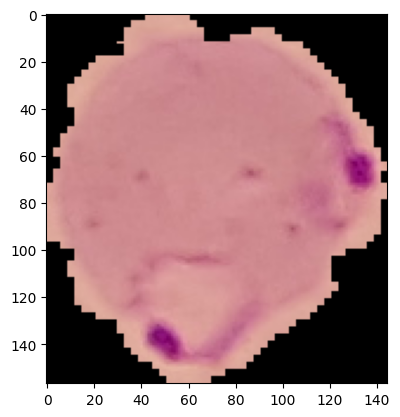

In [15]:
plt.imshow(para_cell_arr) # one cell for infection

In [16]:
uninfected_cell = os.listdir(train_dir + '/uninfected')[0]
uninfected_cell_path = train_dir + '/uninfected/' + uninfected_cell
uninfected_cell_arr = imread(uninfected_cell_path)

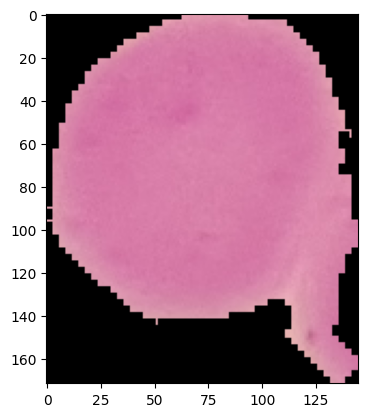

In [17]:
plt.imshow(uninfected_cell_arr) # one uninfected cell

In [18]:
len(os.listdir(train_dir + '/parasitized'))

12480

In [19]:
len(os.listdir(train_dir + '/uninfected'))

12480

## Check image sizes of the dataset

In [20]:
dirs = []
for image_filename in os.listdir(train_dir + '/uninfected'):
  image_filepath = train_dir + '/uninfected/' + image_filename
  dirs.append(image_filepath)

In [21]:
dim1s = []
dim2s = []

for dir in dirs:
  try:
    img = imread(dir)
    dim1, dim2, colors = img.shape
    dim1s.append(dim1)
    dim2s.append(dim2)
  except:
    continue

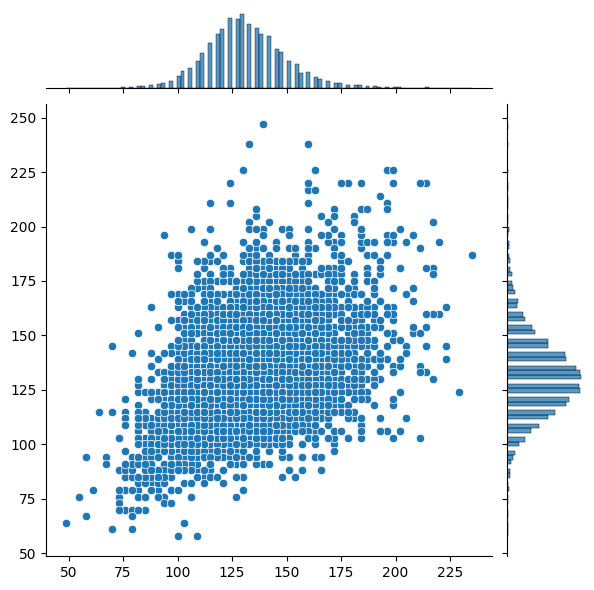

In [22]:
sns.jointplot(x=dim1s,y=dim2s)

**As Images in the dataset doesn't have a same size, we have to resize them into a same size**

In [23]:
np.mean(dim1s), np.mean(dim2s)

(131.64820899110507, 131.4041990544114)

**AS the average size of images is 132*132, we choose (130,130, 3) as the target image size**

## Data Processing

In [24]:
img_shape = (130,130,3)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
img_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

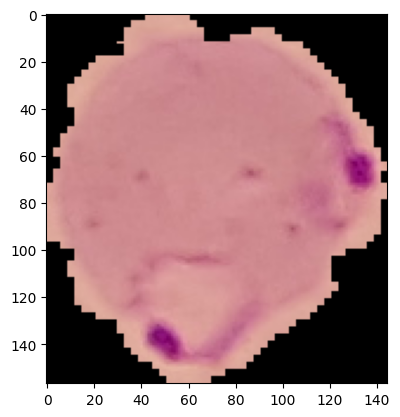

In [27]:
plt.imshow(para_cell_arr)

**Test the processor**

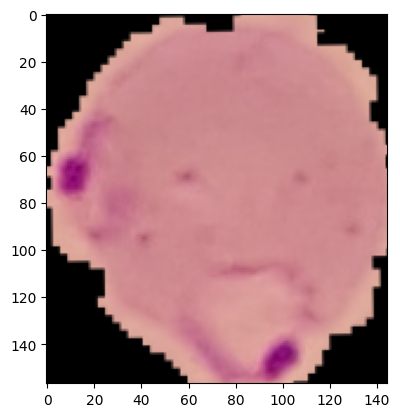

In [28]:
plt.imshow(img_gen.random_transform(para_cell_arr))

## Build the model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = 'accuracy')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
BATCH_SIZE = 32

## Image Generator for image processing

In [35]:
train_img_gen = img_gen.flow_from_directory(train_dir, target_size = img_shape[:2], color_mode='rgb', batch_size=BATCH_SIZE, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [36]:
test_img_gen = img_gen.flow_from_directory(test_dir, target_size = img_shape[:2], color_mode='rgb', batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [37]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Fit the model using generated images

In [41]:
# results = model.fit_generator(train_img_gen, epochs=50, validation_data=test_img_gen, callbacks=[early_stop])

In [42]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/04-CNNs/malaria_detector.h5')

## Test model metrics

In [43]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.evaluate_generator(test_img_gen)

<ipython-input-46-5b4f8bad75f6>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_img_gen)


[0.15019865334033966, 0.9503846168518066]

In [45]:
pred_proba = model.predict_generator(test_img_gen)

<ipython-input-45-f8208152d7da>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_proba = model.predict_generator(test_img_gen)


In [48]:
pred_proba

array([[5.2729947e-04],
       [1.5341589e-04],
       [1.2866184e-03],
       ...,
       [9.8928016e-01],
       [9.8240387e-01],
       [9.7546715e-01]], dtype=float32)

In [53]:
y_pred = (pred_proba > 0.5)

In [54]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [55]:
y_test = test_img_gen.classes

In [56]:
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [57]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



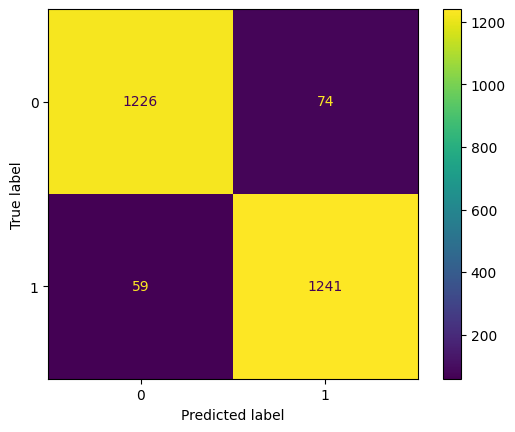

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Test on one image

In [60]:
one_cell = os.listdir(test_dir + '/parasitized')[101]
one_cell_path = test_dir + '/parasitized/' + one_cell
one_cell_path

'/content/drive/MyDrive/Colab Notebooks/jose_tensorflow/DATA/cell_images/cell_images/test/parasitized/C130P91ThinF_IMG_20151004_142951_cell_159.png'

In [61]:
from tensorflow.keras.preprocessing import image

In [64]:
img_to_test = image.load_img(one_cell_path, target_size=img_shape)

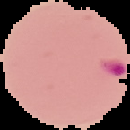

In [65]:
img_to_test

In [68]:
img_to_test_arr = image.img_to_array(img_to_test)

In [69]:
img_to_test_arr.shape

(130, 130, 3)

In [70]:
img_to_test_arr = np.expand_dims(img_to_test_arr, axis=0)

In [71]:
img_to_test_arr.shape


(1, 130, 130, 3)

In [72]:
model.predict(img_to_test_arr)

1/1 [==============================] - 0s 155ms/step


array([[0.01603441]], dtype=float32)

In [73]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

**The model succeed**